In [1]:
import tensorflow 
from tensorflow import keras
#Sequential class allows you to build a neural network model layer by layer in a sequential manner.
from tensorflow.keras import Sequential
#Dense: This layer is used to create fully connected layers in a neural network. Each neuron in a dense layer receives input from all neurons in the previous layer.
# layer is used to flatten the input, which is typically a multi-dimensional array or tensor, into a one-dimensional array. It is often used when transitioning from convolutional layers  to fully connected layers 
from tensorflow.keras.layers import Dense,Flatten

In [3]:
#X_train: This variable will hold the training images, which are grayscale images of handwritten digits.
#y_train: This variable will hold the corresponding labels for the training images. Each label represents the digit (0 to 9) that the corresponding image represents.
#X_test: This variable will hold the testing images, which are a separate set of grayscale images of handwritten digits.
#y_test: This variable will hold the corresponding labels for the testing images.
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
#X_test: This variable contains the testing images from the MNIST dataset. 
# it means that there are 10,000 images in the test set, and each image is a 28x28 pixel grayscale image.
X_test.shape

(10000, 28, 28)

In [5]:
#y_train contains the labels corresponding to the training images in the MNIST dataset
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

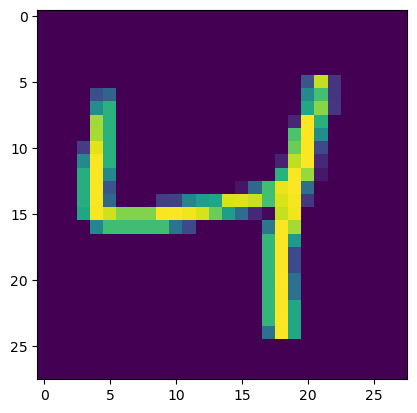

In [7]:
#X_train[2]: This accesses the third image (index 2 because indexing starts from 0) from the training dataset X_train. Each element of X_train is an array representing a grayscale image of a handwritten digit.
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [8]:
# Normailzation process is been done.
#This line divides each pixel value in the training dataset X_train by 255. 
#The pixel values in grayscale images typically range from 0 to 255, where 0 represents black and 255 represents white.
#By dividing each pixel value by 255, all the pixel values are scaled down to the range between 0 and 1.
X_train=X_train/255
# Similarly, this line performs the same normalization operation on the testing dataset X_test. It divides each pixel value in the testing dataset by 255, ensuring that both the training and testing data are normalized 
X_test=X_test/255

In [9]:
#retrieves the first image from the training dataset (X_train) in the MNIST dataset
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
#his line creates a new neural network model using the Sequential class from Keras. The Sequential model is a linear stack of layers, where you can add layers one by one in sequence.
model= Sequential()
#Flatten: This layer is used to flatten the input, which is typically a multi-dimensional array or tensor, into a one-dimensional array. In this case, it's used to flatten the 28x28 input images into a 1D array of 784 elements.
#input_shape=(28, 28): This argument specifies the shape of the input data. Since the MNIST images are 28x28 pixels, the input shape is set to (28, 28).
model.add(Flatten(input_shape=(28,28)))
#Dense: This layer is a standard fully connected layer where each neuron is connected to every neuron in the previous layer.
#128: This parameter specifies the number of neurons in this dense layer. It's a hyperparameter that can be adjusted based on the complexity of the problem.
#activation='relu': This specifies the activation function used by the neurons in this layer. ReLU (Rectified Linear Unit) is a commonly used activation function in hidden layers of neural networks due to its ability to introduce non-linearity into the model.
model.add(Dense(128,activation='relu'))
#This line adds another fully connected layer to the model.
#32: This layer has 32 neurons.
#activation='relu': It also uses the ReLU activation function.
model.add(Dense(32,activation='relu'))
#his line adds the output layer to the model.
#10: This specifies the number of output neurons in the output layer. Since the MNIST dataset contains 10 classes (digits 0 through 9), there are 10 output neurons, each corresponding to one class.
#activation='softmax': The softmax activation function is used in the output layer for multi-class classification problems. It converts the raw output values into probabilities, where each value represents the probability of the corresponding class. The output probabilities sum up to 1, making it suitable for classification tasks.
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#model.compile: This is a method used to compile the neural network model.
#loss='sparse_categorical_crossentropy': This parameter specifies the loss function to use during training.
#For classification tasks where the target labels are integers (as in the MNIST dataset), sparse_categorical_crossentropy is commonly used. It calculates the cross-entropy loss between the true labels and the predicted probabilities.
#The "sparse" part indicates that the target labels are integers rather than one-hot encoded vectors.
#Adam is a popular optimization algorithm that is widely used for training neural networks. It combines the benefits of AdaGrad and RMSProp optimizers and adapts the learning rates for each parameter during training.
#This parameter specifies the metrics to evaluate the model's performance during training and testing.
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
#The fit method is used to train the model on the provided training data.
#These are the training data inputs and corresponding target labels, 
#X_train contains the input images, and y_train contains the corresponding labels for those images.
#An epoch is one complete pass through the entire training dataset. Here, the model will be trained for 25 epochs, meaning it will see the entire training dataset 25 times during training.
#0.2 indicates that 20% of the training data will be used for validation, while the remaining 80% will be used for actual training.
#validation data is used to evaluate the model's performance on data that it hasn't seen during training
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.9140 - val_loss: 0.1478 - val_accuracy: 0.9568
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9628 - val_loss: 0.1139 - val_accuracy: 0.9644
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0923 - val_accuracy: 0.9725
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0639 - accuracy: 0.9798 - val_loss: 0.0972 - val_accuracy: 0.9715
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.1000 - val_accuracy: 0.9705
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0938 - val_accuracy: 0.9731
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.1088 - val_accuracy:

In [17]:
#The shape of y_prob will be (number of samples in X_test, number of classes).
#This is the prediction step where the model predicts the probabilities of each class for each sample in the testing dataset (X_test).
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 785us/step


In [18]:
#y_pred: This variable will hold the predicted labels for each sample in the testing dataset. After applying the argmax() function, it will contain the index of the class with the highest probability for each sample.
#y_prob: This is the variable that holds the predicted probabilities for each class for each sample in the testing dataset. It's the result of the model's prediction using model.predict(X_test).
# This is a NumPy method used to find the indices of the maximum values along a specified axis.
#axis=1: Specifies that the maximum value should be found along the second axis (i.e., the columns).
y_pred=y_prob.argmax(axis=1)

In [20]:
#Find the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.978

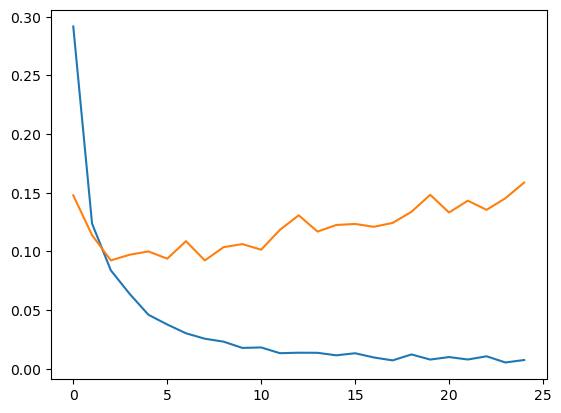

In [21]:
#This line plots the training loss over epochs.
plt.plot(history.history['loss'])
#This line plots the validation loss over epochs.
#validation loss represents the value of the loss function on the validation dataset at each epoch. It indicates how well the model generalizes to unseen data and helps monitor for overfitting. 
plt.plot(history.history['val_loss'])

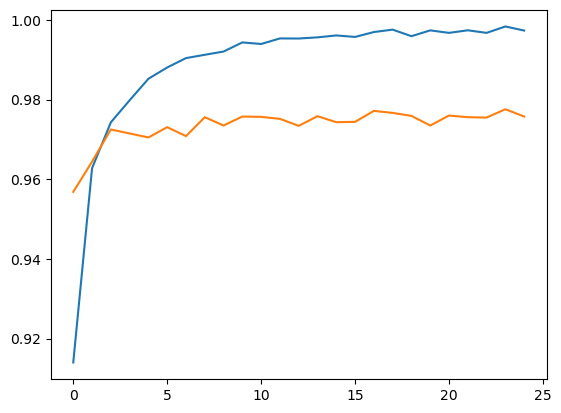

In [22]:
# plots the training accuracy over epochs.
#The training accuracy represents the proportion of correctly classified samples in the training dataset at each epoch
plt.plot(history.history['accuracy'])
#his line plots the validation accuracy over epochs.
#The validation accuracy represents the proportion of correctly classified samples in the validation dataset at each epoch. It indicates how well the model generalizes to unseen data and helps monitor for overfitting.
plt.plot(history.history['val_accuracy'])

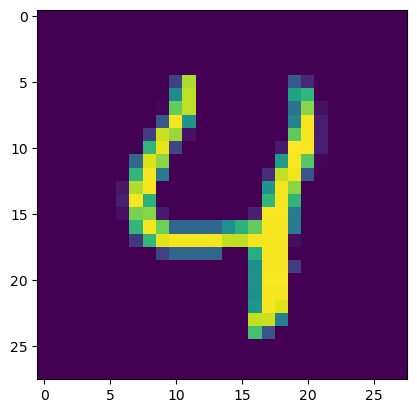

In [27]:
#This accesses the fifth image (index 4 because indexing starts from 0) from the testing dataset X_test
plt.imshow(X_test[4])

In [29]:
#making a prediction on a single image from the testing dataset.
#This reshapes the image into the format expected by the model. The model expects input images to have a shape of (batch_size, height, width). 
#argmax(axis=1) extracts the index of the class with the highest probability from the prediction result.
#argmax(axis=1) returns the index of the maximum value, which represents the predicted class.
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 11ms/step


array([4], dtype=int64)